# USA Real Estate


Fuente: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

Crime data: https://www.kaggle.com/datasets/mathchi/violent-crime-rates-by-us-state/discussion

Shoootings: https://www.kaggle.com/datasets/ahsen1330/us-police-shootings


In [83]:
from pathlib import Path
import json
import csv
import time
import re

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

## Configuración

In [84]:
data_folder = Path().cwd().parent / 'data' / 'house_pricing'

csv_file = data_folder / 'realtor-data.csv'

print(f'Folder {data_folder} existe: {data_folder.exists()}')

Folder /home/luiscberrocal/PycharmProjects/pylearn-data-101/data/house_pricing existe: True


## Carga de datos

### Realtor dataframe

In [85]:
# df = pd.read_csv(csv_file)
df = pd.read_csv(csv_file, engine='pyarrow', dtype_backend='pyarrow')
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,<NA>
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,<NA>
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,<NA>
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,<NA>
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,<NA>,<NA>


#### Shape

Filas y columnas

In [86]:
print(f'Filas {df.shape[0]} Columnas: {df.shape[1]}')

Filas 733159 Columnas: 12


#### Info

Nombre y tipo de columnas

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype               
---  ------        --------------   -----               
 0   status        733159 non-null  string[pyarrow]     
 1   price         733088 non-null  double[pyarrow]     
 2   bed           617177 non-null  double[pyarrow]     
 3   bath          621407 non-null  double[pyarrow]     
 4   acre_lot      572378 non-null  double[pyarrow]     
 5   full_address  733159 non-null  string[pyarrow]     
 6   street        733159 non-null  string[pyarrow]     
 7   city          733159 non-null  string[pyarrow]     
 8   state         733159 non-null  string[pyarrow]     
 9   zip_code      732957 non-null  double[pyarrow]     
 10  house_size    520772 non-null  double[pyarrow]     
 11  sold_date     347237 non-null  date32[day][pyarrow]
dtypes: date32[day][pyarrow](1), double[pyarrow](6), string[pyarrow](5)
memory usage: 108.5

#### Describe


In [88]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size,sold_date
count,7.330880e+05,617177.000000,621407.000000,572378.000000,732957.000000,5.207720e+05,347237
mean,7.257017e+05,3.422041,2.540473,19.058585,5736.101623,2.192527e+03,2008-11-08
min,0.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1901-01-01
25%,2.375000e+05,2.000000,2.000000,0.140000,2492.000000,1.195000e+03,2002-08-26
50%,4.190000e+05,3.000000,2.000000,0.350000,6001.000000,1.714000e+03,2009-07-22
75%,7.250000e+05,4.000000,3.000000,1.380000,7928.000000,2.547250e+03,2017-10-12
max,8.750000e+08,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06,2023-03-01
std,1.768769e+06,2.028735,2.002442,1022.007111,3764.935565,3.141461e+03,NaN


In [89]:
df['state'].value_counts()

state
New Jersey        191280
Massachusetts     175248
Connecticut        89776
New York           66088
New Hampshire      51394
Vermont            46460
Maine              36650
Rhode Island       29596
Puerto Rico        24679
Pennsylvania       17148
Virgin Islands      2573
Delaware            2135
Georgia               50
Virginia              31
South Carolina        25
Tennessee             20
Wyoming                3
West Virginia          3
Name: count, dtype: int64[pyarrow]

### Shooting dataframe


In [90]:
data_folder = Path().cwd().parent / 'data' / 'house_pricing'

shooting_file = data_folder / 'shootings.csv'

In [95]:
shootings = pd.read_csv(shooting_file, engine='pyarrow', dtype_backend='pyarrow')
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [96]:
shootings.shape

(4895, 15)

In [97]:
shootings['city'].value_counts()

city
Los Angeles     78
Phoenix         66
Houston         51
Las Vegas       41
San Antonio     40
                ..
Mustang          1
New Rochelle     1
Industry         1
Paso Robles      1
Crown Point      1
Name: count, Length: 2288, dtype: int64[pyarrow]

In [99]:
shootings_x_city = shootings.groupby(shootings['city'])['city'].count()

shootings_x_city.head()

city
Abbeville            1
Aberdeen             2
Abilene              3
Abingdon             2
Abington Township    1
Name: city, dtype: int64

## Limpieza de datos

### Join shootings

In [93]:
df1 = pd.merge(df, shootings, how='inner', left_on = 'city', right_on = 'city')

print(f'Filas joined {df1.shape[0]:,}')

Filas joined 1,406,743


In [94]:
df1.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state_x,zip_code,house_size,sold_date,id,name,date,manner_of_death,armed,age,gender,race,state_y,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,for_sale,49900.0,3.0,1.0,0.09,"A-21 Calle # 2, Salinas, PR, 00751",A-21 Calle # 2,Salinas,Puerto Rico,751.0,870.0,<NA>,2225,Marlon Joel Rodas-Sanchez,2017-01-18,shot and Tasered,knife,16.0,M,Hispanic,CA,False,other,Not fleeing,True,Sharp objects
1,for_sale,49900.0,3.0,1.0,0.09,"A-21 Calle # 2, Salinas, PR, 00751",A-21 Calle # 2,Salinas,Puerto Rico,751.0,870.0,<NA>,4536,Brenda Rodriguez Mendoza,2019-03-01,shot,gun,20.0,F,Hispanic,CA,False,other,Other,False,Guns
2,for_sale,1356000.0,<NA>,<NA>,29.00,"Santiago Iglesias, Salinas, PR, 00751",Santiago Iglesias,Salinas,Puerto Rico,751.0,<NA>,<NA>,2225,Marlon Joel Rodas-Sanchez,2017-01-18,shot and Tasered,knife,16.0,M,Hispanic,CA,False,other,Not fleeing,True,Sharp objects
3,for_sale,1356000.0,<NA>,<NA>,29.00,"Santiago Iglesias, Salinas, PR, 00751",Santiago Iglesias,Salinas,Puerto Rico,751.0,<NA>,<NA>,4536,Brenda Rodriguez Mendoza,2019-03-01,shot,gun,20.0,F,Hispanic,CA,False,other,Other,False,Guns
4,for_sale,1356000.0,<NA>,<NA>,29.00,"Santiago Iglesias, Salinas, PR, 00751",Santiago Iglesias,Salinas,Puerto Rico,751.0,<NA>,<NA>,2225,Marlon Joel Rodas-Sanchez,2017-01-18,shot and Tasered,knife,16.0,M,Hispanic,CA,False,other,Not fleeing,True,Sharp objects


In [75]:
df = df1

In [76]:
df1.isna().sum()

status                           0
price                           28
bed                         162874
bath                        128205
Lot area (acres)            555517
Full Address                     0
street                           0
city                             0
state_x                          0
Zip code                         2
House size (square feet)    326429
sold_date                   689929
id                               0
name                             0
date                             0
manner_of_death                  0
armed                            0
age                              0
gender                           0
race                             0
state_y                          0
signs_of_mental_illness          0
threat_level                     0
flee                             0
body_camera                      0
arms_category                    0
dtype: int64

### Renombrar columnas

In [77]:
create_column_dict = True

if create_column_dict:
    column_dict = {}
    for col in df.columns:
        column_dict[col] = col
    column_mapping_file = data_folder / 'column_mapping.json'
    with open(column_mapping_file, 'w') as f:
        json.dump(column_dict, f)

In [78]:
column_dict = {
  "acre_lot": "Lot area (acres)",
  "full_address": "Full Address",
  "zip_code": "Zip code",
  "house_size": "House size (square feet)",
}

In [79]:
df = df.rename(columns=column_dict)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406743 entries, 0 to 1406742
Data columns (total 26 columns):
 #   Column                    Non-Null Count    Dtype               
---  ------                    --------------    -----               
 0   status                    1406743 non-null  string[pyarrow]     
 1   price                     1406715 non-null  double[pyarrow]     
 2   bed                       1243869 non-null  double[pyarrow]     
 3   bath                      1278538 non-null  double[pyarrow]     
 4   Lot area (acres)          851226 non-null   double[pyarrow]     
 5   Full Address              1406743 non-null  string[pyarrow]     
 6   street                    1406743 non-null  string[pyarrow]     
 7   city                      1406743 non-null  string[pyarrow]     
 8   state_x                   1406743 non-null  string[pyarrow]     
 9   Zip code                  1406741 non-null  double[pyarrow]     
 10  House size (square feet)  1080314 non-null

### Using map to rename states

In [81]:
us_state_file = Path.cwd() / 'us_states.json'

with open(us_state_file, 'r') as f:
    us_states = json.load(f)
    
print(us_states)

{'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}


In [82]:
df['state']=df['state'].map(us_states)

df['state'].value_counts()

KeyError: 'state'

### Adding income tax

In [14]:
df['bath_tub'] = None


### Saving file

In [15]:
output_file = data_folder / 'python-panama-real-estate.csv'

df.to_csv(output_file, index=False)

print(output_file)

/home/luiscberrocal/PycharmProjects/pylearn-data-101/data/house_pricing/python-panama-real-estate.csv


## EDA

### Revisando los datos de los precios

<Axes: >

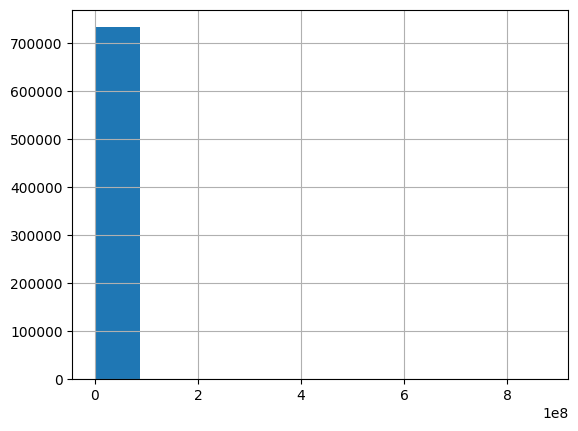

In [16]:
df['price'].hist()

#### Finding prices == 0.0 

In [17]:
zeros = df.loc[df['price'] == 0.0]

print(zeros.shape)

(39, 13)


In [18]:
zeros.head()

,status,price,bed,bath,Lot area (acres),Full Address,street,city,state,Zip code,House size (square feet),sold_date,bath_tub
465599,for_sale,0.0,<NA>,<NA>,0.17,"535 E 29th St, Paterson, NJ, 07504",535 E 29th St,Paterson,NJ,7504.0,4500.0,<NA>,None
465600,for_sale,0.0,<NA>,<NA>,0.22,"541 E 29th St, Paterson, NJ, 07504",541 E 29th St,Paterson,NJ,7504.0,5000.0,<NA>,None
469243,for_sale,0.0,4.0,4.0,<NA>,"330 E 38th St Unit 35CD, New York, NY, 10016",330 E 38th St Unit 35CD,New York,NY,10016.0,<NA>,<NA>,None
472798,for_sale,0.0,<NA>,<NA>,0.17,"535 E 29th St, Paterson, NJ, 07504",535 E 29th St,Paterson,NJ,7504.0,4500.0,<NA>,None
472804,for_sale,0.0,<NA>,<NA>,0.22,"541 E 29th St, Paterson, NJ, 07504",541 E 29th St,Paterson,NJ,7504.0,5000.0,<NA>,None


#### Eliminando filas con precio Zero

In [19]:
zeros_index = df.loc[df['price'] == 0.0].index

In [20]:
df = df.drop(zeros_index)

In [21]:
print(df.shape)

(733120, 13)


In [22]:
df['price'].describe()

count    7.330490e+05
mean     7.257403e+05
std      1.768808e+06
min      1.000000e+00
25%      2.379000e+05
50%      4.190000e+05
75%      7.250000e+05
max      8.750000e+08
Name: price, dtype: double[pyarrow]

#### Buscando valores extremos

In [23]:
ext = df.loc[df['price'] >= 1e7]

print(ext.shape)

(2619, 13)


In [24]:
ext['state'].value_counts()

state
NY    1309
MA     809
NJ     156
CT     119
NH      58
VT      14
PA      13
RI       6
Name: count, dtype: int64

In [25]:
ext['price'].describe()

count    2.619000e+03
mean     1.748360e+07
std      1.910068e+07
min      1.000000e+07
25%      1.200000e+07
50%      1.495000e+07
75%      1.889900e+07
max      8.750000e+08
Name: price, dtype: double[pyarrow]

### Creando campos nuevos

#### Areas en m2

In [26]:
df['house_size_m2'] = df['House size (square feet)'] * 0.092903
df['lot_size_m2'] = df['Lot area (acres)'] * 4046.86

In [27]:
df['house_size_m2'].describe()

count    520756.000000
mean        203.685007
std         291.852678
min           9.290300
25%         111.019085
50%         159.235742
75%         236.623941
max      134719.755136
Name: house_size_m2, dtype: double[pyarrow]

In [28]:
df['lot_size_m2'].describe()

count    5.723620e+05
mean     7.712956e+04
std      4.135977e+06
min      0.000000e+00
25%      5.665604e+02
50%      1.416401e+03
75%      5.584667e+03
max      4.046860e+08
Name: lot_size_m2, dtype: double[pyarrow]

#### Precio x metro cuadrado de contruccion

In [29]:
df['price_x_m2'] = df['price'] / df['house_size_m2'] 

In [30]:
df['price_x_m2'].describe()

count    5.206850e+05
mean     4.037730e+03
std      7.011745e+03
min      2.202110e+00
25%      1.811236e+03
50%      2.690979e+03
75%      4.255185e+03
max      3.860011e+06
Name: price_x_m2, dtype: double[pyarrow]

<Axes: >

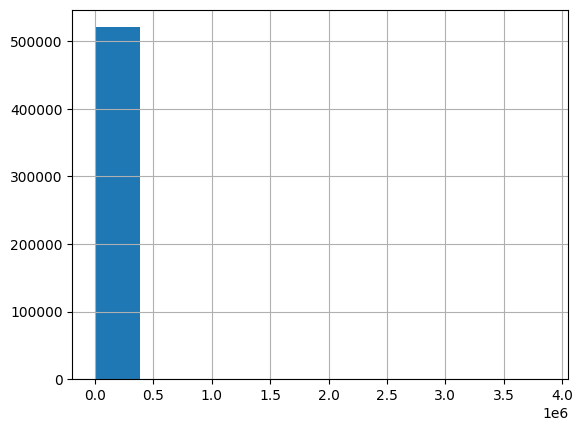

In [31]:
df['price_x_m2'].hist()

In [32]:
df['city'].value_counts()

city
Boston           31502
New York City    15447
New York         12971
Philadelphia     10416
Brooklyn          6914
                 ...  
Solebury             1
Pipersville          1
Lumberville          1
Kingwood             1
Erwinna              1
Name: count, Length: 2439, dtype: int64[pyarrow]

### Revisando valores nulos

In [33]:
df.isna().sum()

status                           0
price                           71
bed                         115953
bath                        111723
Lot area (acres)            160758
Full Address                     0
street                           0
city                             0
state                        27252
Zip code                       202
House size (square feet)    212364
sold_date                   385896
bath_tub                    733120
house_size_m2               212364
lot_size_m2                 160758
price_x_m2                  212435
dtype: int64

In [34]:
df = df.dropna(subset=['house_size_m2', 'lot_size_m2', 'bed', 'bath'])

In [35]:
print(df.shape)

(383547, 16)
